In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"F:\PetData.csv")
print(df.head())
print(df.info())


            name  age         city own_pets pet_type vet_visit_frequency  \
0     Rohit Rana   21   Hoshiarpur      Yes      Dog             Monthly   
1  Simran Thakur   20      Talwara       No      Dog      Every 3 months   
2         Sahil    24     Talwara       Yes      Dog      Every 6 months   
3         Ankita   24  Chandigarh        No      Dog             Monthly   
4        Deepali   22    Jalandhar       No    Other               Never   

         monthly_spend                             most_spend_on   \
0  Less than 1,000 INR  Regular exercise;Training;Veterinary care   
1      1,000-3,000 INR                  Regular exercise;Training   
2      1,000-3,000 INR                           Regular exercise   
3  More than 5,000 INR                           Regular exercise   
4  Less than 1,000 INR                              Pet insurance   

        food_type aware_pet_insurance has_pet_insurance  \
0  Homemade meals                  No                No   
1  Homemad

In [3]:
print(df.isnull().sum())

name                             0
age                              0
city                             0
own_pets                         0
pet_type                         0
vet_visit_frequency              0
monthly_spend                    0
most_spend_on                    1
food_type                        0
aware_pet_insurance              0
has_pet_insurance                0
increase_in_pet_ownership        0
pets_beneficial_for_wellbeing    0
consider_adopting_pets           0
dtype: int64


In [4]:
df.dropna(inplace=True)

In [5]:
print(df.isnull().sum())

name                             0
age                              0
city                             0
own_pets                         0
pet_type                         0
vet_visit_frequency              0
monthly_spend                    0
most_spend_on                    0
food_type                        0
aware_pet_insurance              0
has_pet_insurance                0
increase_in_pet_ownership        0
pets_beneficial_for_wellbeing    0
consider_adopting_pets           0
dtype: int64


Pet Ownership Statistics:
own_pets
Yes    9
No     7
Name: count, dtype: int64


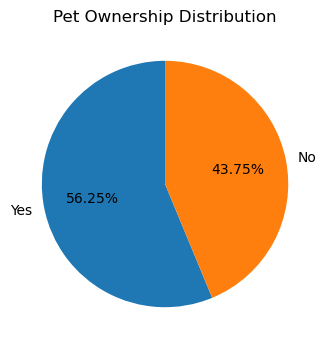

In [6]:

pet_ownership_count = df['own_pets'].value_counts()
print("Pet Ownership Statistics:")
print(pet_ownership_count)

plt.figure(figsize=(4, 4))
pet_ownership_count.plot.pie(autopct='%1.2f%%',startangle=90)
plt.title('Pet Ownership Distribution')
plt.ylabel('')
plt.show()


In [7]:
monthly_spend_summary = df['monthly_spend'].value_counts()
print("\nMonthly Spending Habits:")
print(monthly_spend_summary)

df['monthly_spend_numeric'] = df['monthly_spend'].replace({
    'Less than 1,000 INR': 500,
    '1,000-3,000 INR': 2000,
    '3,000-5,000 INR': 4000,
    'More than 5,000 INR': 6000
})
print(df['monthly_spend_numeric'].head())



Monthly Spending Habits:
monthly_spend
1,000-3,000 INR        8
Less than 1,000 INR    5
More than 5,000 INR    2
3,000-5,000 INR        1
Name: count, dtype: int64
0     500
1    2000
2    2000
3    6000
4     500
Name: monthly_spend_numeric, dtype: int64



Average Monthly Spending on Pets: 2156.25 INR


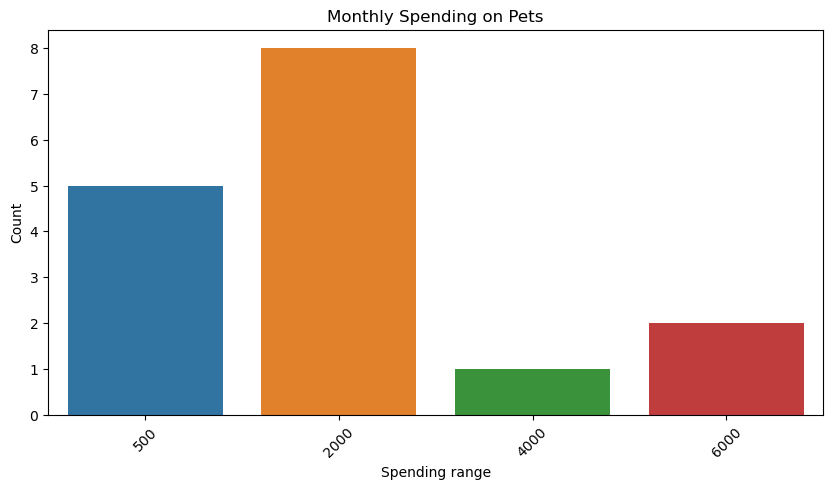

In [8]:
average_spend = df['monthly_spend_numeric'].mean()
print(f"\nAverage Monthly Spending on Pets: {average_spend:.2f} INR")

plt.figure(figsize=(10, 5))
sns.countplot(x='monthly_spend_numeric', data=df)
plt.title('Monthly Spending on Pets')
plt.xlabel('Spending range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Pet Insurance Awareness:
aware_pet_insurance
Yes    9
No     7
Name: count, dtype: int64


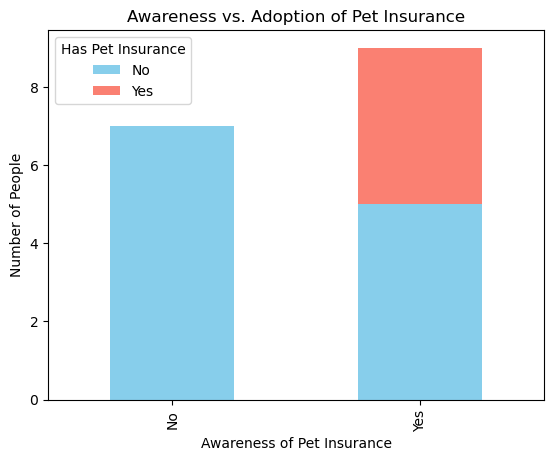

In [12]:
insurance_awareness = df['aware_pet_insurance'].value_counts()
print("\nPet Insurance Awareness:")
print(insurance_awareness)

insurance_comparison = df.groupby('aware_pet_insurance')['has_pet_insurance'].value_counts().unstack()


insurance_comparison.plot(kind='bar',stacked=True, color=['skyblue', 'salmon'])
plt.title('Awareness vs. Adoption of Pet Insurance')
plt.xlabel('Awareness of Pet Insurance')
plt.ylabel('Number of People')
plt.legend(title='Has Pet Insurance')
plt.show()


In [13]:
wellbeing_benefit = df['pets_beneficial_for_wellbeing'].value_counts()
print("\nBenefits of Pets for Mental Well-Being:")
print(wellbeing_benefit)


Benefits of Pets for Mental Well-Being:
pets_beneficial_for_wellbeing
yes    15
No      1
Name: count, dtype: int64


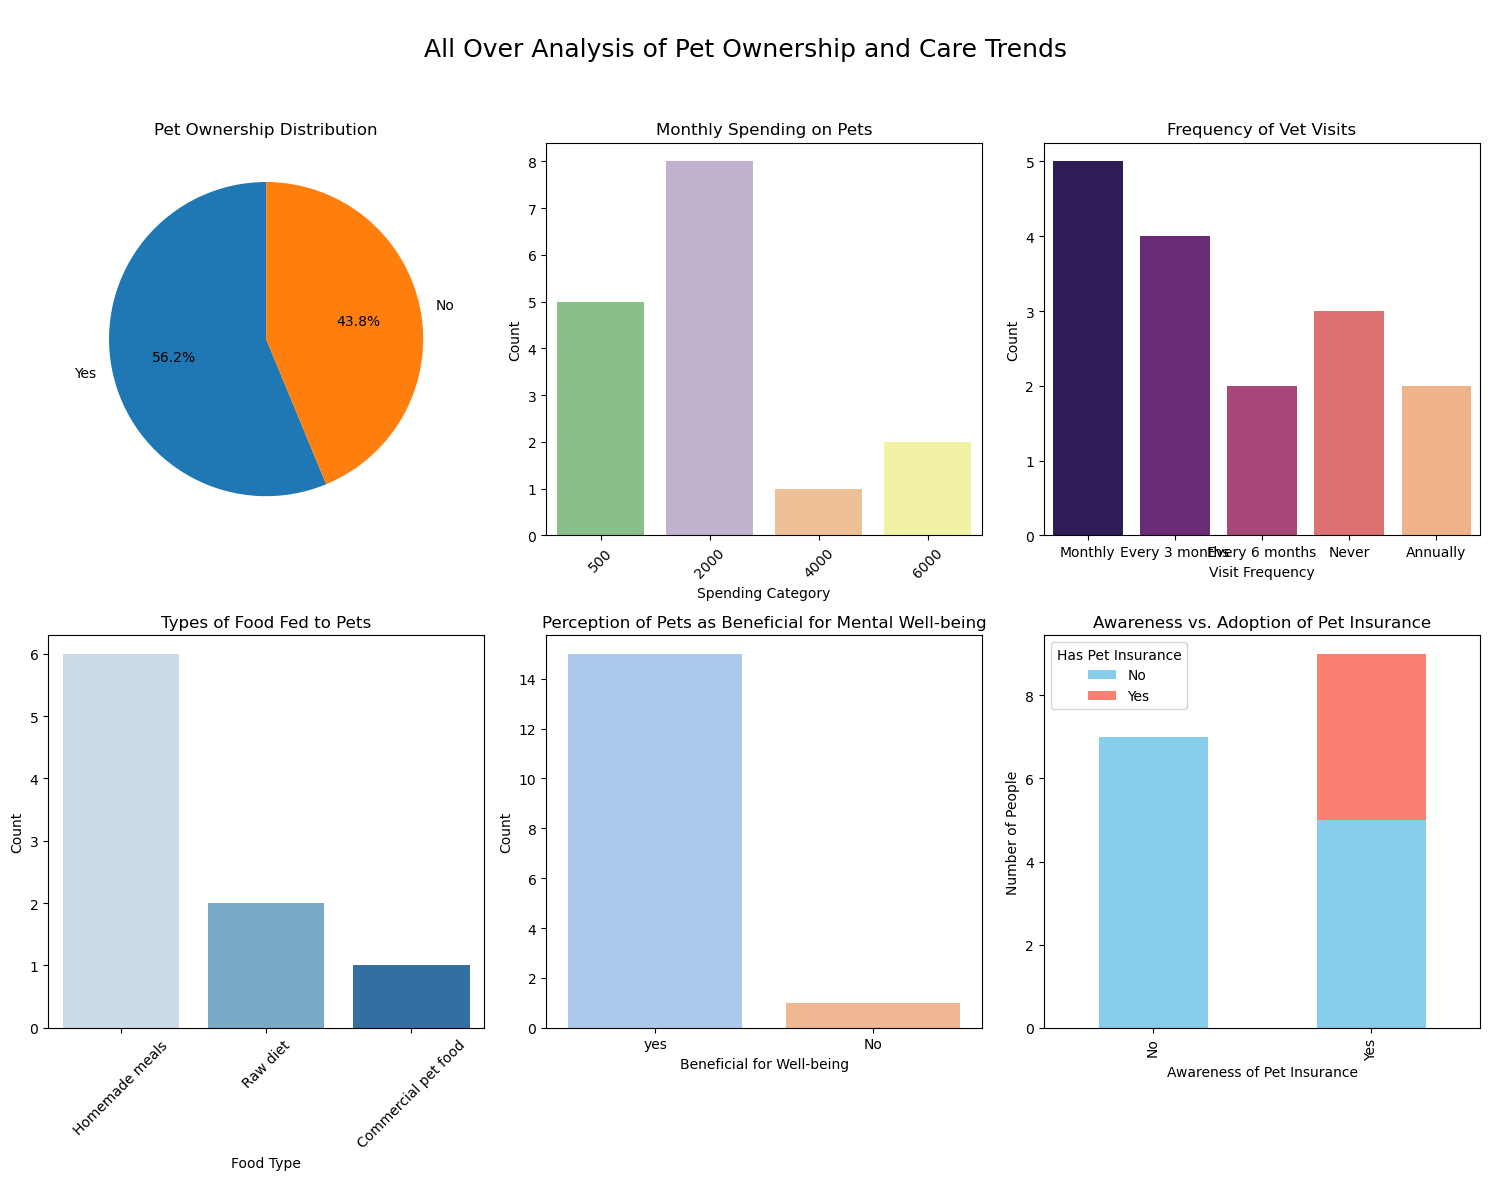

In [14]:
fig,axes = plt.subplots(2, 3, figsize=(15, 12)) 
fig.suptitle('\nAll Over Analysis of Pet Ownership and Care Trends\n\n', fontsize=18)

pet_ownership_count.plot.pie(ax=axes[0, 0], autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Pet Ownership Distribution')
axes[0, 0].set_ylabel('')  

sns.countplot(x='monthly_spend_numeric', data=df, palette='Accent', ax=axes[0, 1])
axes[0, 1].set_title('Monthly Spending on Pets')
axes[0, 1].set_xlabel('Spending Category')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(x='vet_visit_frequency', data=df, palette='magma', ax=axes[0, 2])
axes[0, 2].set_title('Frequency of Vet Visits')
axes[0, 2].set_xlabel('Visit Frequency')
axes[0, 2].set_ylabel('Count')


sns.countplot(x='food_type', data=df[df['own_pets'] == 'Yes'], palette='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Types of Food Fed to Pets')
axes[1, 0].set_xlabel('Food Type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(x='pets_beneficial_for_wellbeing', data=df, palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title('Perception of Pets as Beneficial for Mental Well-being')
axes[1, 1].set_xlabel('Beneficial for Well-being')
axes[1, 1].set_ylabel('Count')

insurance_comparison.plot(kind='bar',stacked=True, color=['skyblue', 'salmon'],ax=axes[1, 2])
axes[1, 2].set_title('Awareness vs. Adoption of Pet Insurance')
axes[1, 2].set_xlabel('Awareness of Pet Insurance')
axes[1, 2].set_ylabel('Number of People')
axes[1, 2].legend(title='Has Pet Insurance')

plt.tight_layout()  
plt.show()
